## About Dataset
**Context**
- **The Pakistan Super League (PSL) is a professional Twenty20 cricket league in Asia, primarily held in Pakistan and the UAE. Established in 2015 by the Pakistan Cricket Board (PCB), PSL features six franchise teams representing major cities. The league follows a round-robin format, where teams compete in group-stage matches before advancing to playoffs and the grand final. Known for its thrilling contests, international star players, and passionate fanbase, PSL has grown into one of the most competitive T20 leagues in the world.**
- **This dataset captures the entire history of PSL matches, enabling cricket analysts, data scientists, and fans to explore match trends, player performances, and strategic insights.**

**Content**
- Geography:Pakistan, UAE (Asia)
- Time Period: February 4, 2016 – March 18, 2024
- Unit of Analysis: Pakistan Super League (PSL) Matches

**Variables**

The dataset consists of ball-by-ball records and match summaries, making it ideal for detailed performance analysis. Below is a breakdown of the dataset's key columns:

**Column Name	Description**
- id	Unique identifier for each delivery
- match_id	Unique identifier for each match
- date	Date of the match
- season	PSL season in which the match was played
- venue	Stadium where the match was played
- inning	Inning number
- batting_team	Team currently batting
- bowling_team	Team currently bowling
- over	Over number in the innings (0 to 19)
- ball	Ball number in the over (1 to 6)
- batter	Name of the batsman on strike
- bowler	Name of the bowler delivering the ball
- non_striker	Name of the non-striking batsman
- batsman_runs	Runs scored by the batsman on that delivery
- extra_runs	Runs awarded as extras (wides, no-balls, etc.)
- total_runs	Sum of batsman and extra runs for the delivery
- extras_type	Type of extra run (wide, no-ball, bye, etc.)
- is_wicket	Indicates if a wicket fell on that delivery (1 = Yes, 0 = No)
- player_dismissed	Name of the dismissed player (if any)
- dismissal_kind	Method of dismissal (bowled, caught, run out, etc.)
- fielder	Name of the fielder involved in the dismissal (if applicable)
- winner	Team that won the match
- win_by	Margin of victory (runs or wickets)
- match_type	Type of match (league, playoff, final)
- player_of_match	Name of the best-performing player of the match
- umpire_1	Name of the first on-field umpire
- umpire_2	Name of the second on-field umpire

**Acknowledgements**
- Data Source: Cricsheet

--------

📊 Step 1: Understand & Explore the Dataset
Check what your PSL 2016–2024 dataset includes. Typical useful data could be:

Match-level info (teams, scores, venue, toss, result)

Player stats (runs, wickets, strike rate, economy)

Team-level performance per season (wins, NRR, rankings)

Season winners

👉 Try to create a season-level summary dataset, where each row = 1 team in 1 season.

📚 Step 2: Data Preprocessing
Create features for each team per season. Example features:


Season	Team	Wins	Losses	NRR	Avg Score	Wickets Taken	Winner
2024	PZ	6	4	0.35	170.4	72	Yes
Encode the target: Winner = 1, others = 0

Encode categorical variables (like team names)

Handle missing values

Normalize numeric features (optional, depending on model)

🔍 Step 3: Feature Engineering
You can build season-level aggregates like:

Total runs scored/conceded by the team

Average strike rate / bowling economy

No. of wins/losses

Toss win rate

Home vs away performance

Optional advanced features:

Strength score based on player stats (e.g., average runs of top 3 batsmen)

Momentum (win streaks)

Consistency (how often a team reaches playoffs/finals)

🤖 Step 4: Model Building
You can use classification models:

Logistic Regression

Random Forest Classifier

XGBoost

LightGBM

Target: Winner (1 = team that won the season, 0 = not won)

Train the model on seasons 2016–2023, and test/predict for 2024 to validate your logic.

🔮 Step 5: Predict 2025 Winner
Once the model is trained on 2016–2024 data, you’ll need 2025 pre-season or early-season team features to predict. This might include:

Draft picks

Team strength based on past player performances

Early match performance if available

If no real 2025 data is available, assume hypothetical data or use average of past seasons to simulate predictions.

📈 Step 6: Evaluation
Since only 1 team wins per season:

Evaluate your model's ability to rank teams (e.g., predict top-2 teams)

Use metrics like:

Accuracy (only useful if you predict just the winner)

F1-score / ROC-AUC (on multi-class classification)

Ranking metrics like MRR or NDCG if you predict probabilities

🧠 Bonus: Try Ensemble or Ranking Models
Instead of classifying a winner, try ranking all teams based on predicted strength/probability.

You can then select the top-ranked team as your predicted winner.

🚀 Tools You Can Use
Python (pandas, sklearn, xgboost, seaborn/matplotlib for viz)

Jupyter Notebook for iterative analysis

Power BI or Tableau if you want to visualize trends

## Data Exploration

### Import Libraraies

In [395]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

### Load Dataset

In [396]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/machine learning projects/Machine-Learning-Projects/PSL 2025 Winner Prediction/Psl_Complete_Dataset(2016-2024).csv')
df.sample(5)

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2
41183,341,1293019,2022-02-13,2022,"Gaddafi Stadium, Lahore",2,Lahore Qalandars,Quetta Gladiators,7,4,Fakhar Zaman,Noor Ahmad,Kamran Ghulam,1,0,1,NaN,False,NaN,NaN,NaN,Lahore Qalandars,wickets 8,regular,Shaheen Shah Afridi,Asif Yaqoob,MA Gough
38593,206,1293009,2022-02-03,2022,"National Stadium, Karachi",1,Islamabad United,Quetta Gladiators,7,3,PR Stirling,Shahid Afridi,C Munro,1,0,1,NaN,False,NaN,NaN,NaN,Islamabad United,runs 43,regular,C Munro,Imtiaz Iqbal,RK Illingworth
65175,498,959213,2016-02-17,2016,Dubai International Cricket Stadium,2,Islamabad United,Lahore Qalandars,17,1,Asif Ali,Ehsan Adil,Misbah-ul-Haq,0,0,0,NaN,False,NaN,NaN,NaN,Islamabad United,wickets 5,regular,Mohammad Irfan,JS Wilson,Aleem Dar
28482,233,1247011,2021-02-20,2021,National Stadium,1,Quetta Gladiators,Karachi Kings,18,3,Qais Ahmad,Mohammad Amir,Naseem Shah,0,0,0,NaN,False,NaN,NaN,NaN,Karachi Kings,wickets 7,regular,Arshad Iqbal,Ahsan Raza,Aleem Dar
5596,203,1128818,2018-02-22,2018,Dubai International Cricket Stadium,2,Multan Sultans,Peshawar Zalmi,9,3,KC Sangakkara,Mohammad Asghar,Shoaib Malik,0,0,0,NaN,False,NaN,NaN,NaN,Multan Sultans,wickets 7,regular,KC Sangakkara,Ahmed Shahab,RT Robinson


-----------

### Summary of Dataset

- The dataset contains 65,448 rows and 21 Features
- The dataset contains 12 categorical Features
- The dataset contains 9 numerical Features
- The dataset contains 1 date feature and 1 boolean feature

========================================================

**No of Unique values in columns** 
- No of unique values in venue: 10
- No of unique values in batting_team: 6
- No of unique values in bowling_team: 6
- No of unique values in batter: 342
- No of unique values in bowler: 244
- No of unique values in non_striker: 336
- No of unique values in winner: 7
- No of unique values in win_by: 73
- No of unique values in match_type: 4
- No of unique values in player_of_match: 127
- No of unique values in umpire_1: 20
- No of unique values in umpire_2: 17
- No of unique values in season: 9
- No of unique values in inning: 4
- No of unique values in over: 20
- No of unique values in ball: 11
- No of unique values in batsman_runs: 7
- No of unique values in extra_runs: 6
- No of unique values in total_runs: 8

=========================================================

**Features Summary**

**PSL played on 10 different venues**
  -  Dubai International Cricket Stadium' 
  -  'Sharjah Cricket Stadium'
  -  'Gaddafi Stadium' 
  -  National Stadium' 
  -  'Sheikh Zayed Stadium'
  -  'Multan Cricket Stadium' 
  -  'Rawalpindi Cricket Stadium'
  -  'National Stadium, Karachi' 
  -  'Sheikh Zayed Stadium, Abu Dhabi'
  -  'Gaddafi Stadium, Lahore'

=========================================================

**PSL played on 2 Different countries**
  - UAE
  - Pakistan

=========================================================

**PSL has 6 Teams**
  - Islamabad United
  - Karachi Kings
  - Lahore Qalander
  - Multan Sultan
  - Quetta Gladiators
  - Peshawar Zalmi

=========================================================

**The format of PSL is T20**  

=========================================================

**The dataset contains 9 seasons record**
  - 2016
  - 2017
  - 2018
  - 2019
  - 2020
  - 2021
  - 2022
  - 2023
  - 2024

In [397]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66112 entries, 0 to 66111
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                66112 non-null  int64 
 1   match_id          66112 non-null  int64 
 2   date              66112 non-null  object
 3   season            66112 non-null  int64 
 4   venue             66112 non-null  object
 5   inning            66112 non-null  int64 
 6   batting_team      66112 non-null  object
 7   bowling_team      66112 non-null  object
 8   over              66112 non-null  int64 
 9   ball              66112 non-null  int64 
 10  batter            66112 non-null  object
 11  bowler            66112 non-null  object
 12  non_striker       66112 non-null  object
 13  batsman_runs      66112 non-null  int64 
 14  extra_runs        66112 non-null  int64 
 15  total_runs        66112 non-null  int64 
 16  extras_type       3561 non-null   object
 17  is_wicket   

,id,match_id,season,inning,over,ball,batsman_runs,extra_runs,total_runs
count,66112.000000,6.611200e+04,66112.000000,66112.000000,66112.000000,66112.000000,66112.000000,66112.000000,66112.000000
mean,260.512570,1.221449e+06,2020.286468,1.483392,10.141714,3.617392,1.280025,0.069382,1.349407
std,107.596957,1.270599e+05,2.487097,0.502625,5.654251,1.811348,1.652216,0.356554,1.640215
min,1.000000,9.591750e+05,2016.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,182.000000,1.128843e+06,2018.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,260.000000,1.211672e+06,2020.000000,1.000000,10.000000,4.000000,1.000000,0.000000,1.000000
75%,339.000000,1.293031e+06,2022.000000,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000
max,521.000000,1.416505e+06,2024.000000,4.000000,20.000000,11.000000,6.000000,5.000000,7.000000


---------

## Data Preprocessing

### Deal with data anomilies

- Remove id and match_id columns it didn't help in information
- Change date column type into date format 

In [398]:
df.drop(columns=['id'], axis=1, inplace=True)

In [399]:
df['date']= pd.to_datetime(df['date'])

In [400]:
df['venue'].value_counts()

venue
Dubai International Cricket Stadium    14111
Gaddafi Stadium, Lahore                 9008
Sharjah Cricket Stadium                 8772
National Stadium, Karachi               8686
National Stadium                        8093
Rawalpindi Cricket Stadium              5739
Sheikh Zayed Stadium, Abu Dhabi         4716
Multan Cricket Stadium                  3129
Gaddafi Stadium                         2888
Sheikh Zayed Stadium                     970
Name: count, dtype: int64

In [401]:
df['venue'] = df['venue'].replace({'National Stadium' : 'National Stadium, Karachi', 
                                   'Gaddafi Stadium' : 'Gaddafi Stadium, Lahore', 
                                   'Sheikh Zayed Stadium' : 'Sheikh Zayed Stadium, Abu Dhabi'})

-----

### Deal with Missing values

In [402]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index()

,index,0
0,fielder,96.519543
1,dismissal_kind,94.699903
2,player_dismissed,94.699903
3,extras_type,94.613686
4,player_of_match,1.004356
5,match_id,0.000000
6,date,0.000000
7,umpire_1,0.000000
8,match_type,0.000000
9,win_by,0.000000


Remove those columns which has missing values > 40%:

In [403]:
df.drop(columns=['fielder', 'dismissal_kind', 'player_dismissed', 'extras_type'], axis=1, inplace=True)

The player_of_match column contains missing values in approximately 1% of the records. Since this feature represents a match outcome that cannot be accurately imputed or predicted beforehand, and given its minimal impact on the dataset, we chose to remove rows with missing values in this column

In [404]:
df.dropna(inplace=True)

Now we remain with 21 column and drop 1% of data out of 100%.

In [405]:
df.shape

(65448, 22)

---------

### Deal with Duplicates

In [406]:
df.duplicated().sum()

0

No duplicates in the dataset

----------

### Deal with Outliers

In [407]:
num = ['season', 'inning', 'over', 'ball', 'batsman_runs', 'extra_runs','total_runs']

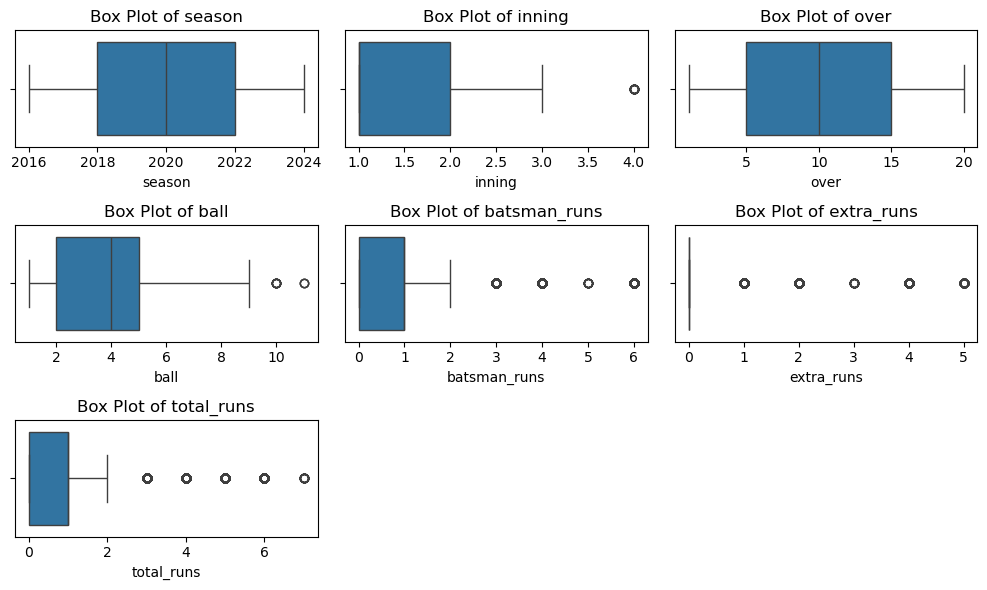

In [408]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(num):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x= df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

Their are no outliers 

------------

## Exploratory Data Analysis

### Univariate Analysis

In [409]:
cat = ['venue', 'batting_team', 'bowling_team', 'batter', 'bowler',
       'non_striker', 'winner', 'win_by', 'match_type', 'player_of_match',
       'umpire_1', 'umpire_2']

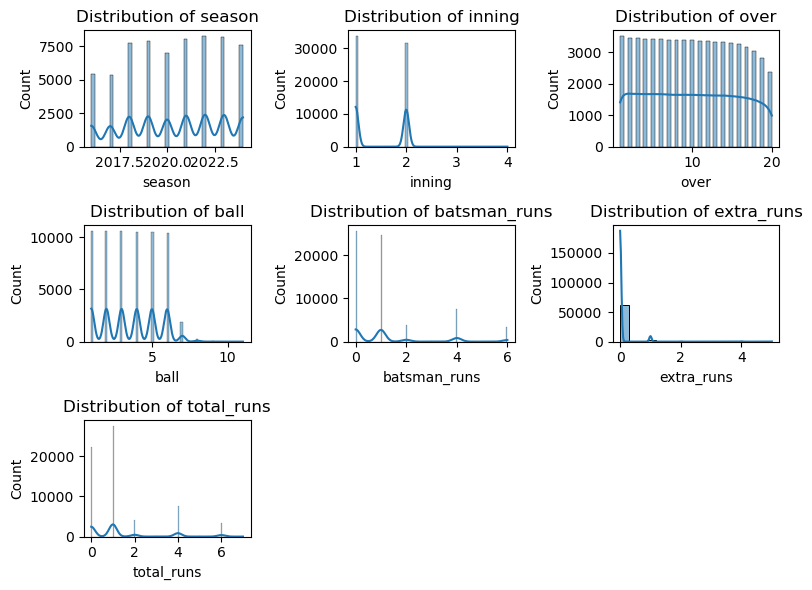

In [410]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(num):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [411]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%b')

**Matches per year & Avg Runs per Over**

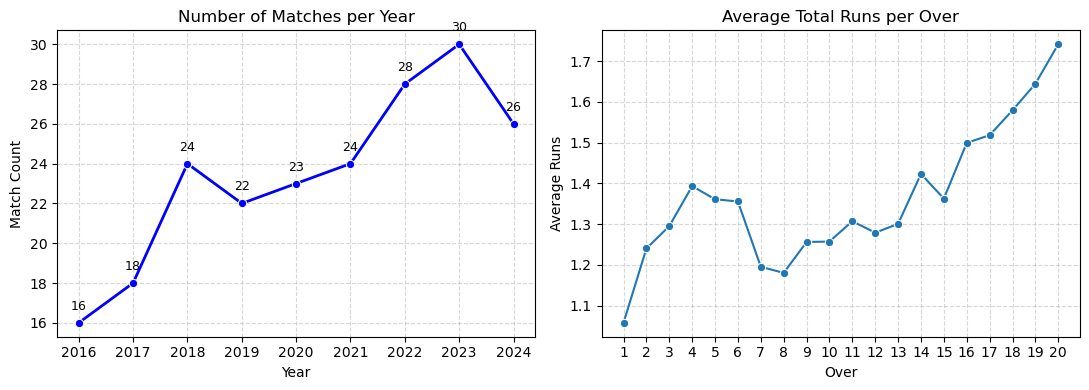

In [412]:
matches_per_year = df.groupby('year')['date'].nunique().reset_index(name='matches')
avg_runs_per_over = df.groupby('over')['total_runs'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.lineplot(x='year', y='matches', data=matches_per_year, marker='o', linewidth=2, color='blue', ax=axes[0])
axes[0].set_title('Number of Matches per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Match Count')
axes[0].grid(True, linestyle='--', alpha=0.5)

for i in range(len(matches_per_year)):
    year = matches_per_year.loc[i, 'year']
    count = matches_per_year.loc[i, 'matches']
    axes[0].text(year, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)

sns.lineplot(data=avg_runs_per_over, x='over', y='total_runs', marker='o', ax=axes[1])
axes[1].set_title('Average Total Runs per Over')
axes[1].set_xlabel('Over')
axes[1].set_ylabel('Average Runs')
axes[1].set_xticks(range(1, 21))
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

- The number of matches has shown a consistent increase each year, indicating the growing scale and popularity of the PSL tournament over time.
- Runs are scored more rapidly during the Powerplay (overs 1–6) and the death overs (16–20)

**Runs Scored on Each Ball**

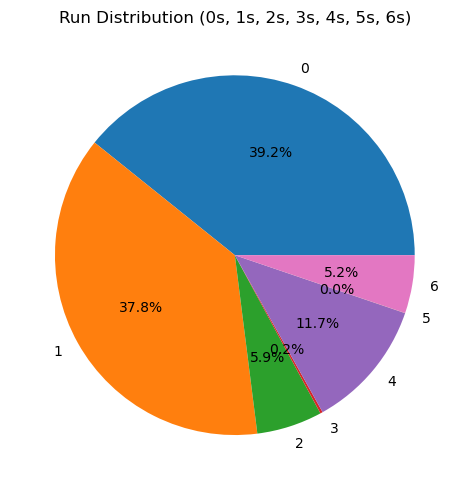

In [413]:
run_distribution = df['batsman_runs'].value_counts().loc[[0, 1, 2, 3, 4, 5, 6]].sort_index()

plt.figure(figsize=(5, 5))
plt.pie(run_distribution, labels=run_distribution.index, autopct='%1.1f%%')
plt.title('Run Distribution (0s, 1s, 2s, 3s, 4s, 5s, 6s)')
plt.tight_layout()
plt.show()

**Most freq Venue**

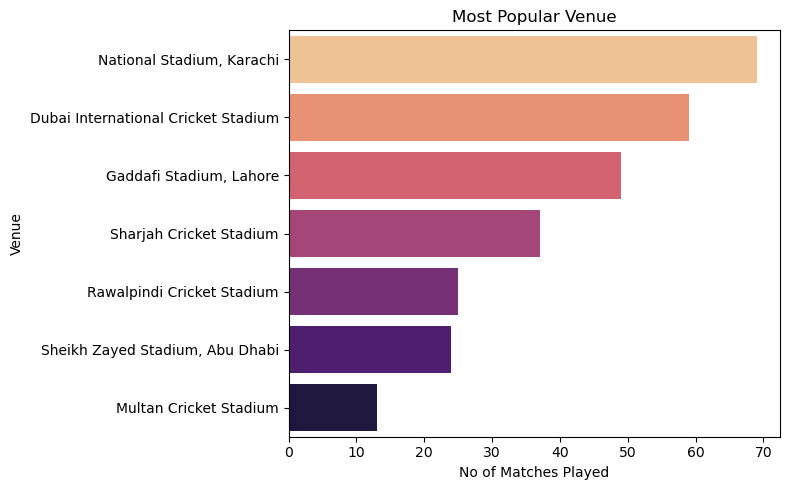

In [414]:
most_freq_venue = df.groupby('venue')['match_id'].nunique().sort_values(ascending=False).reset_index(name='count')

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(y='venue', x='count', data=most_freq_venue, palette='magma_r')
plt.title('Most Popular Venue')
plt.ylabel('Venue')
plt.xlabel('No of Matches Played')
plt.tight_layout()
plt.show()

National Stadium Karachi leading with the most matches played venue over the last 10 years.

**Matches played by each team**

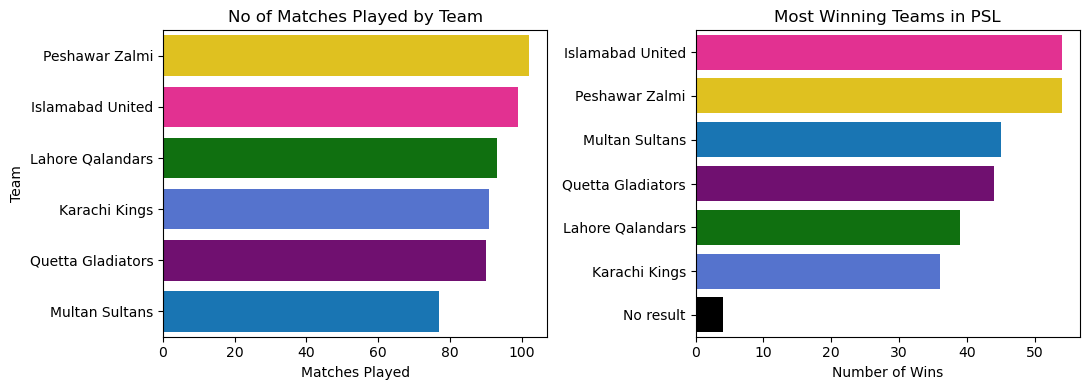

In [415]:
matches_played_by_team = df.groupby('batting_team')['match_id'].nunique().sort_values(ascending=False).reset_index(name='matches_played')

unique_winners = df[['match_id', 'winner']].drop_duplicates()
winning_teams = unique_winners['winner'].value_counts().reset_index()
winning_teams.columns = ['Team', 'Wins']

team_colors = {'Peshawar Zalmi': 'gold',
               'Quetta Gladiators': 'purple',
               'Karachi Kings': 'royalblue',
               'Islamabad United': 'deeppink', 
               'Multan Sultans': '#007acc', 
               'Lahore Qalandars': 'green',
               'No result': 'black'}

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.barplot(data=matches_played_by_team, y='batting_team', x='matches_played',
            palette=team_colors, ax=axes[0])
axes[0].set_title('No of Matches Played by Team')
axes[0].set_xlabel('Matches Played')
axes[0].set_ylabel('Team')

sns.barplot(data=winning_teams, y='Team', x='Wins',
            palette=team_colors, ax=axes[1])
axes[1].set_title('Most Winning Teams in PSL')
axes[1].set_xlabel('Number of Wins')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Peshawar Zalmi had played the most matches among all teams, while Multan Sultans has played the fewest matches, as they joined the PSL in 2018.
- Islamabad United & Peshawar Zalmi have the most wins in the PSL, Karachi Kings have the fewest wins.


**No of Matches played by top 5 Batsmen and Bowler**

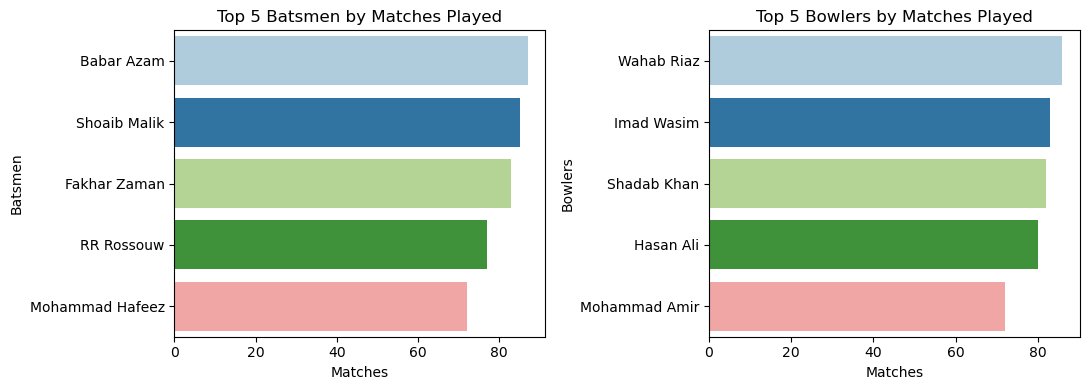

In [416]:
batsmen_matches = df.groupby('batter')['match_id'].nunique().sort_values(ascending=False).head(5)
bowler_matches = df.groupby('bowler')['match_id'].nunique().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.barplot(y=batsmen_matches.index, x=batsmen_matches.values, palette='Paired', ax=axes[0])
axes[0].set_title('Top 5 Batsmen by Matches Played')
axes[0].set_xlabel('Matches')
axes[0].set_ylabel('Batsmen')

sns.barplot(y=bowler_matches.index, x=bowler_matches.values, palette='Paired', ax=axes[1])
axes[1].set_title('Top 5 Bowlers by Matches Played')
axes[1].set_xlabel('Matches')
axes[1].set_ylabel('Bowlers')

plt.tight_layout()
plt.show()

- Among all batsmen, Babar Azam has played the highest number of matches.
- Among bowlers, Wahab Riaz holds the record for most matches played.

------------


### Bivariate Analysis

**Which batting team scores the most against which bowling team**

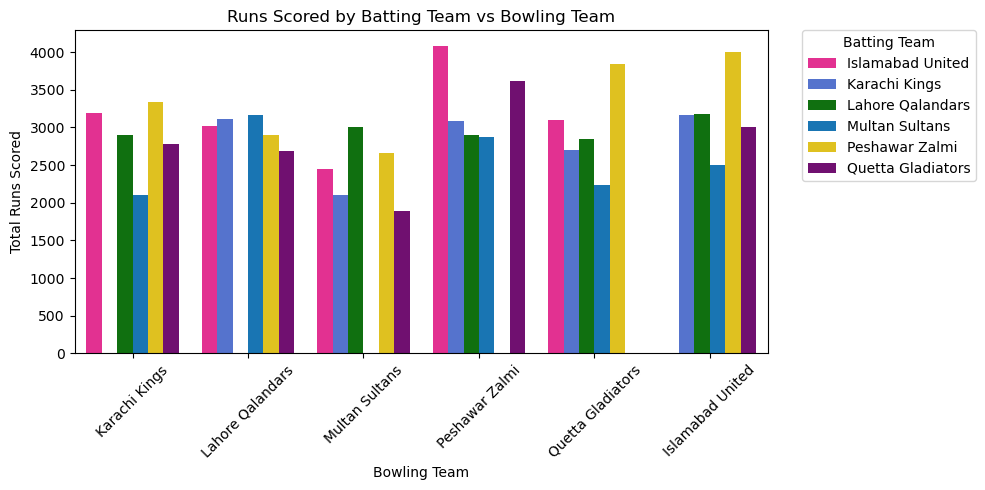

In [417]:
runs_by_teams = df.groupby(['batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=runs_by_teams, x='bowling_team', y='total_runs', hue='batting_team', palette=team_colors)
plt.title('Runs Scored by Batting Team vs Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Total Runs Scored')
plt.legend(title='Batting Team', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


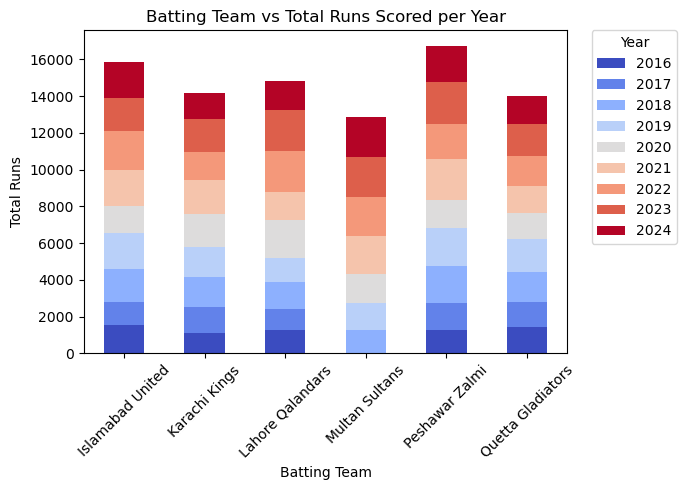

In [418]:
team_runs = df.groupby(['batting_team', 'year'])['total_runs'].sum().unstack().fillna(0)

team_runs.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='coolwarm')
plt.title('Batting Team vs Total Runs Scored per Year')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


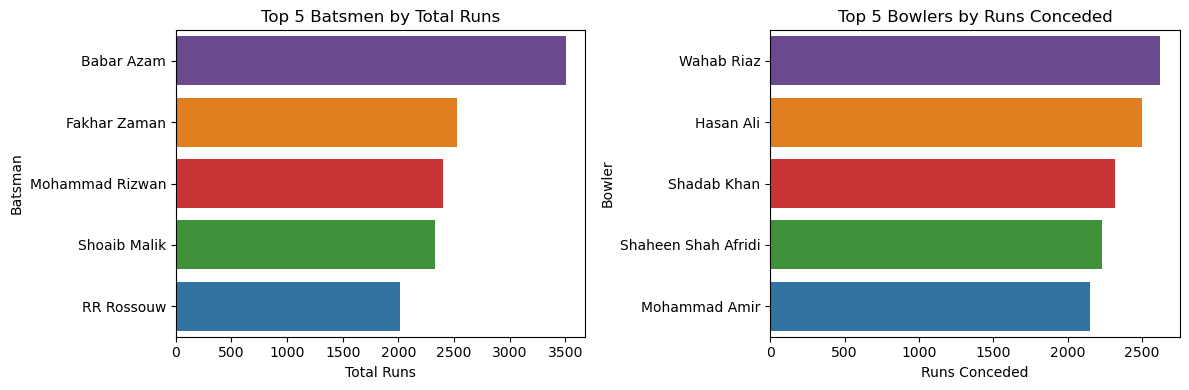

In [419]:
top_batsmen = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5).reset_index()
top_batsmen.columns = ['Batsman', 'Total Runs']

top_bowlers_conceded = df.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(5).reset_index()
top_bowlers_conceded.columns = ['Bowler', 'Runs Conceded']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=top_batsmen, x='Total Runs', y='Batsman', ax=axes[0], palette='Paired_r')
axes[0].set_title('Top 5 Batsmen by Total Runs')
axes[0].set_xlabel('Total Runs')
axes[0].set_ylabel('Batsman')

sns.barplot(data=top_bowlers_conceded, x='Runs Conceded', y='Bowler', ax=axes[1], palette='Paired_r')
axes[1].set_title('Top 5 Bowlers by Runs Conceded')
axes[1].set_xlabel('Runs Conceded')
axes[1].set_ylabel('Bowler')

plt.tight_layout()
plt.show()


- Babar Azam leads the charts with the most runs scored in PSL history
- Wahab Riaz has conceded the most runs throughout all PSL seasons

<Figure size 800x500 with 0 Axes>

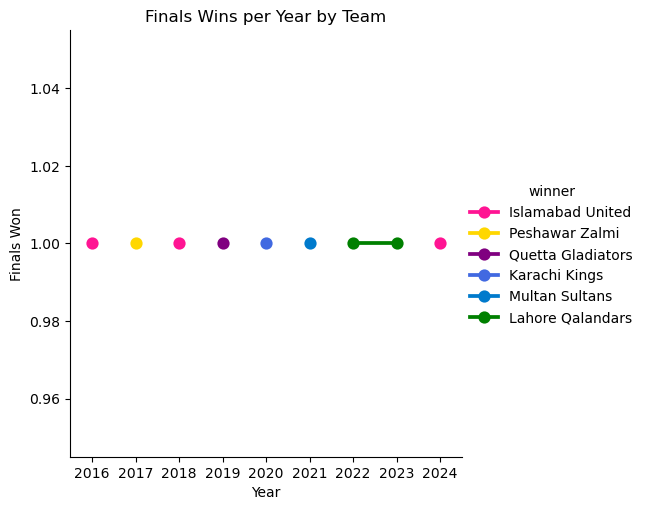

In [420]:
finals_df = df[df['match_type'] == 'final']
unique_finals = finals_df.drop_duplicates(subset=['year', 'date'])
final_wins_per_year = unique_finals.groupby(['year', 'winner']).size().reset_index(name='Finals_Won')

plt.figure(figsize=(8, 5))
sns.catplot(data=final_wins_per_year, x='year', y='Finals_Won', hue='winner', kind='point', palette=team_colors)

plt.title('Finals Wins per Year by Team')
plt.xlabel('Year')
plt.ylabel('Finals Won')
plt.show()

- Islamabad Wins 3 time in 2016, 2018 and 2024
- Lahore Qalandars Wins 2 times in 2022 and 2023
- Remian teams win one one time

-------

### Multivariate Analysis

In [421]:
from matplotlib import cm

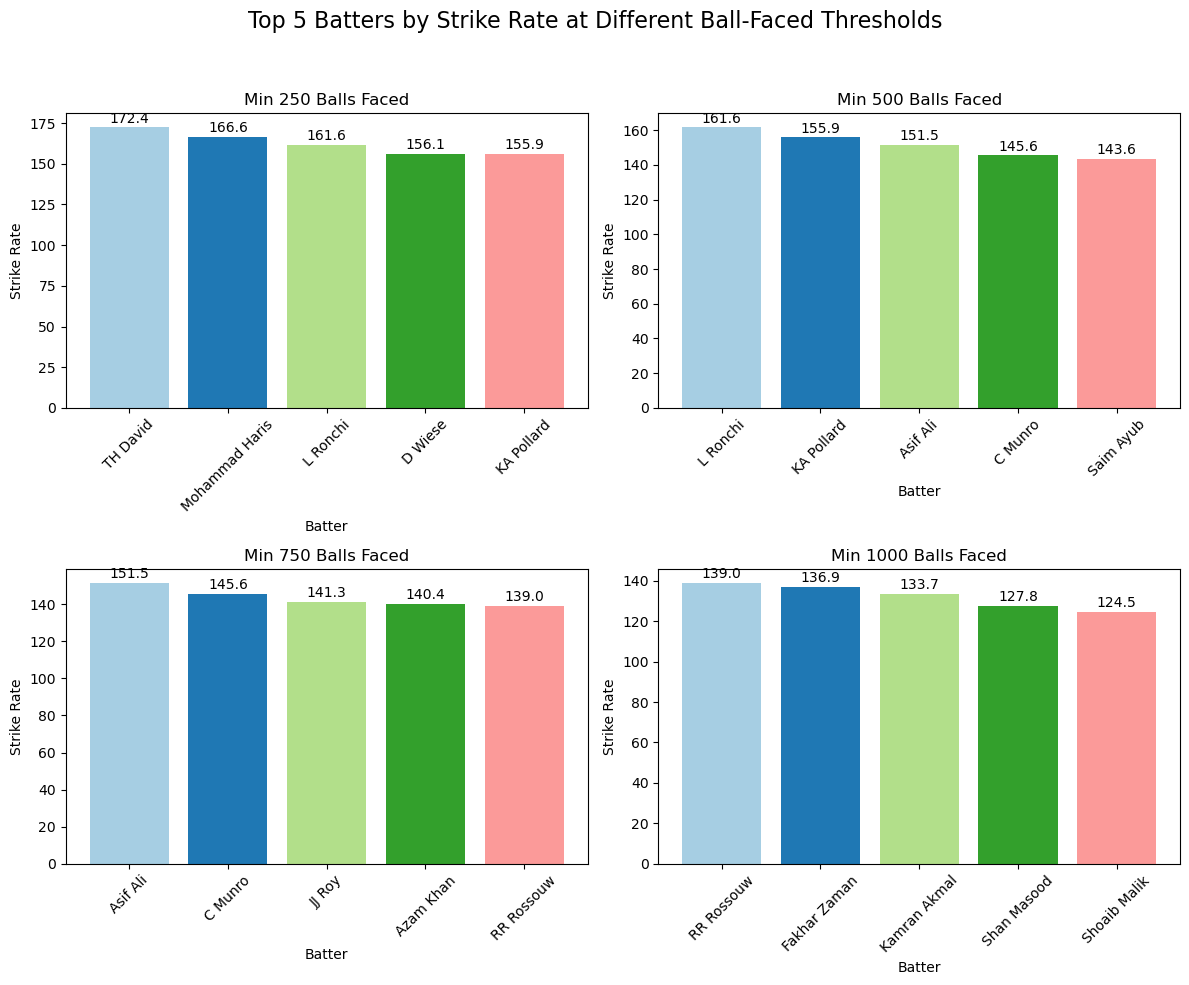

In [422]:
batting_stats = df.groupby('batter').agg({'batsman_runs': 'sum','ball': 'count'}).reset_index()
batting_stats['strike_rate'] = (batting_stats['batsman_runs'] / batting_stats['ball']) * 100

thresholds = [250, 500, 750, 1000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Top 5 Batters by Strike Rate at Different Ball-Faced Thresholds", fontsize=16)

for ax, threshold in zip(axes.flat, thresholds):
    filtered = batting_stats[batting_stats['ball'] >= threshold]
    top_sr = filtered.sort_values(by='strike_rate', ascending=False).head(5)
    colors = cm.Paired.colors[:len(top_sr)]
    bars = ax.bar(top_sr['batter'], top_sr['strike_rate'], color=colors)
    ax.set_title(f"Min {threshold} Balls Faced")
    ax.set_xlabel("Batter")
    ax.set_ylabel("Strike Rate")
    ax.set_xticklabels(top_sr['batter'], rotation=45)

    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                round(bar.get_height(), 1), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Tim David showcased an exceptional strike rate despite facing less than 250 balls, highlighting his explosive impact in limited opportunities.
- Luke Ronchi, with less than 500 balls faced, maintained an outstanding strike rate, making him one of the most efficient hitters in that range.
- Asif Ali, within the 500–750 ball range, stood out with a high strike rate, reinforcing his role as a powerful finisher.
- Rilee Rossouw, with under 1000 balls faced, maintained a consistently aggressive approach, reflected in his top-tier strike rate.

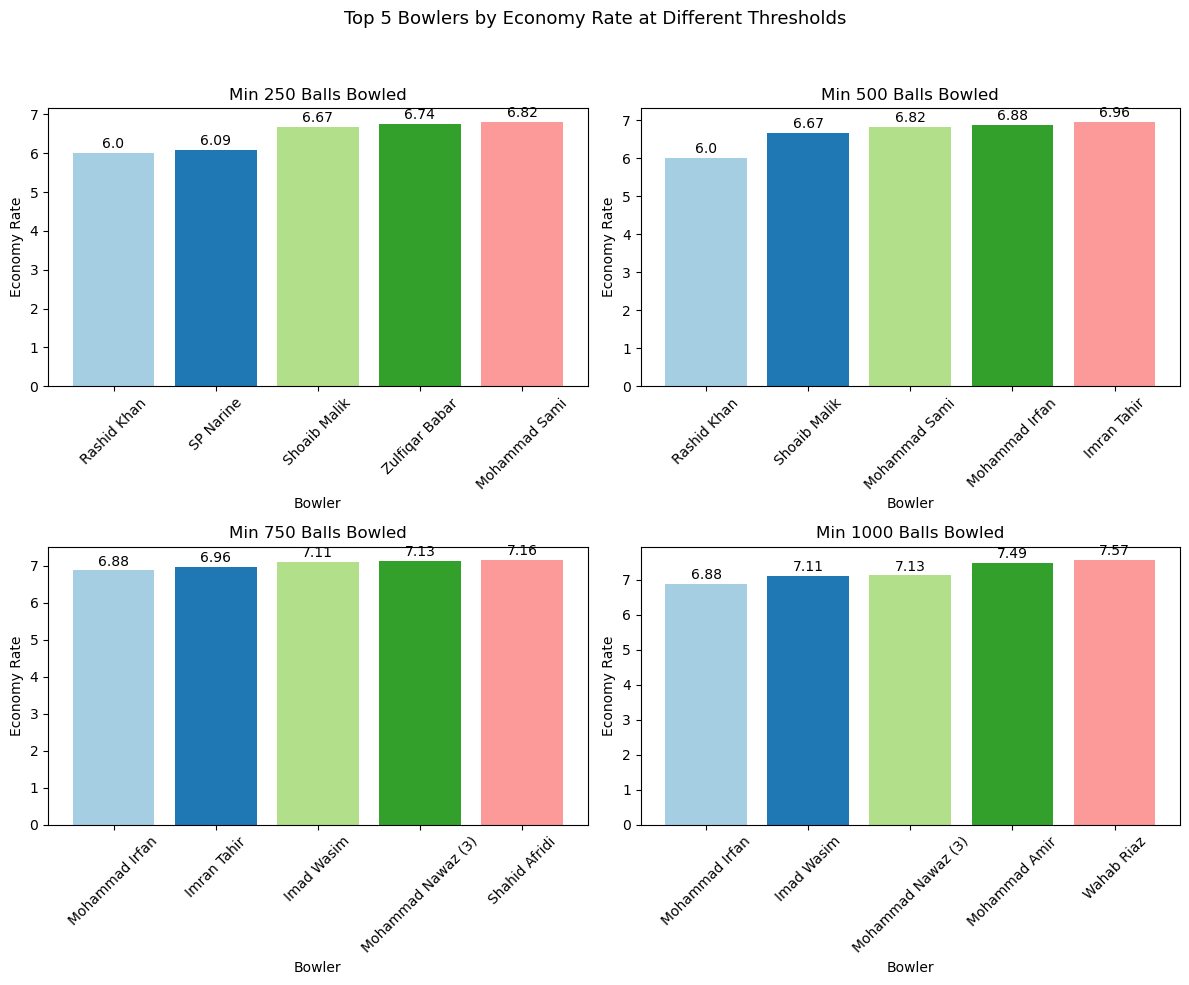

In [423]:
valid_deliveries = df[(df['extra_runs'] == 0)]

bowling_stats = valid_deliveries.groupby('bowler').agg({'ball': 'count','total_runs': 'sum','extra_runs': 'sum'}).sort_values(by='ball', ascending=False).reset_index()
bowling_stats['runs_conceded'] = bowling_stats['total_runs'] - bowling_stats['extra_runs']
bowling_stats['economy_rate'] = (bowling_stats['runs_conceded'] / (bowling_stats['ball'] / 6))

thresholds = [250, 500, 750, 1000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Top 5 Bowlers by Economy Rate at Different Thresholds", fontsize=13)

for ax, threshold in zip(axes.flat, thresholds):
    filtered = bowling_stats[bowling_stats['ball'] >= threshold]
    top_economy = filtered.sort_values(by='economy_rate', ascending=True).head(5) 
    bars = ax.bar(top_economy['bowler'], top_economy['economy_rate'], color=colors)
    ax.set_title(f"Min {threshold} Balls Bowled")
    ax.set_xlabel("Bowler")
    ax.set_ylabel("Economy Rate")
    ax.set_xticklabels(top_economy['bowler'], rotation=45)

    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                round(bar.get_height(), 2), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Rashid Khan stands out with the best economy rate when bowling at least 250 balls, showcasing his exceptional ability to control the game over multiple overs.
- Rashid Khan continues to dominate with the best economy rate for bowlers who have bowled at least 500 balls, cementing his reputation as one of the most economical bowlers.
- Mohammad Irfan, with 750 balls bowled or more, holds the best economy rate, demonstrating his consistency and skill in restricting runs across extended spells.
- Mohammad Irfan maintains his dominance in economy rate, having bowled 1000 balls or more, proving his efficiency and effectiveness as a bowler in long spells.

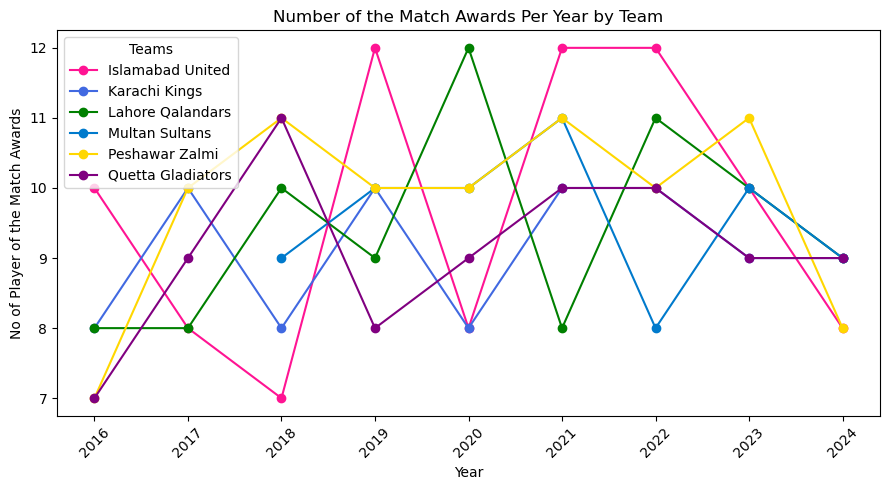

In [424]:
player_of_match_stats = df.groupby(['batting_team', 'year'])['player_of_match'].nunique().reset_index()
player_of_match_stats.rename(columns={'player_of_match': 'unique_pom_awards'}, inplace=True)

plt.figure(figsize=(9, 5))

for team in player_of_match_stats['batting_team'].unique():
    team_data = player_of_match_stats[player_of_match_stats['batting_team'] == team]
    team_color = team_colors.get(team, 'gray')
    plt.plot(team_data['year'], team_data['unique_pom_awards'], marker='o', label=team, color=team_color)

plt.xlabel('Year')
plt.ylabel('No of Player of the Match Awards')
plt.title('Number of the Match Awards Per Year by Team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

Islamabad United has consistently outperformed other teams in terms of the number of Player of the Match (POM) awards in the following years: 2016, 2019, 2021, and 2022. 
In these seasons, Islamabad United had a higher number of POM awards compared to other teams, highlighting their dominant performances in crucial matches.

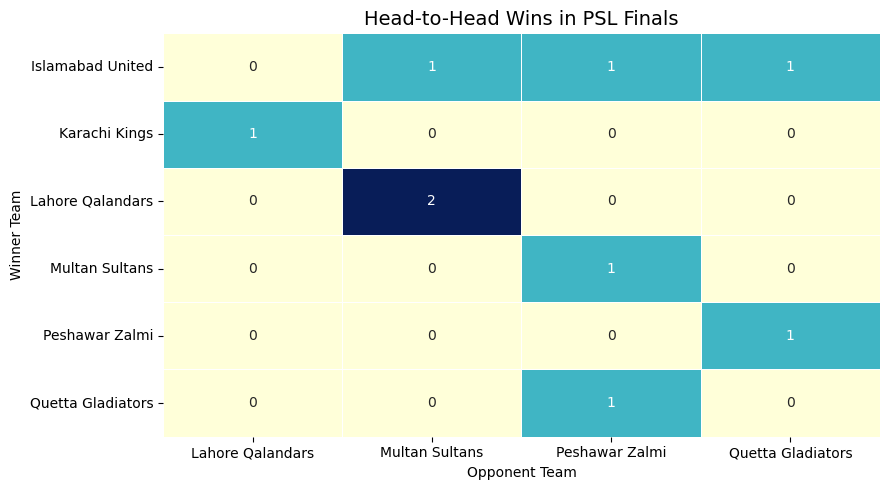

In [425]:
finals_df = df[df['match_type'].str.lower() == 'final'].copy()
unique_finals = finals_df.drop_duplicates(subset=['season', 'venue'])

unique_finals['opponent'] = unique_finals.apply(lambda row: row['batting_team'] if row['batting_team'] != row['winner'] else row['bowling_team'], axis=1)
win_loss_matrix = unique_finals.groupby(['winner', 'opponent']).size().unstack(fill_value=0)

plt.figure(figsize=(9, 5))
sns.heatmap(win_loss_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=False)
plt.title("Head-to-Head Wins in PSL Finals", fontsize=14)
plt.xlabel("Opponent Team")
plt.ylabel("Winner Team")
plt.tight_layout()
plt.show()

- Multan Sultans and Peshawar Zalmi have both reached the finals multiple times but faced tough luck each has lost 3 finals and managed to secure the title only once.
- Islamabad United, on the other hand, has a remarkable record in finals they've never lost a PSL final they played in. 

------------

## Feature Engineering

First of all i create a copy of data, so every feature engineering and feature selection is done on copy of data.

In [426]:
feature_df = df.copy()

Remove the No result from the data so that the model can predict accurately

In [427]:
feature_df = feature_df[feature_df['winner'] != 'No result']

We correct inning values, where 3 = 1 and 4 = 2.

In [428]:
feature_df['inning'] = feature_df['inning'].replace({3: 1, 4: 2})

Change venue as City, rename to it as the Cities name

In [429]:
venue_to_city = {
    'Dubai International Cricket Stadium': 'Dubai',
    'Sharjah Cricket Stadium': 'Sharjah',
    'Sheikh Zayed Stadium, Abu Dhabi': 'Abu Dhabi',
    'Sheikh Zayed Stadium': 'Abu Dhabi',
    'Gaddafi Stadium, Lahore': 'Lahore',
    'Gaddafi Stadium': 'Lahore',
    'National Stadium, Karachi': 'Karachi',
    'National Stadium': 'Karachi',
    'Rawalpindi Cricket Stadium': 'Rawalpindi',
    'Multan Cricket Stadium': 'Multan'}

feature_df['city'] = feature_df['venue'].map(venue_to_city)

Change is_wicket values to True = 1 and False = 0

In [430]:
feature_df['is_wicket'] = feature_df['is_wicket'].replace({True : 1 , False : 0})

Lets remove the irrelevent columns that didn't help us in prediction

In [431]:
feature_df.drop(columns=['date', 'venue',  'year', 'win_by', 'player_of_match' , 'non_striker', 'umpire_1', 'umpire_2', 'month', 'batter', 'bowler'], axis=1, inplace=True)

Now i make of copy of that dataframe to new dataframe where i apply the feature engineering techniques like creating new features that helps in the prediction of the winner of the PSL 2025.

In [434]:
new_df = feature_df.copy()

I created a new data frame overall_oerformance, where it contains
- matched_played by team in each season
- matched_won by team in each season
- win_percentage by team in each season


In [436]:
overall_performance = new_df.groupby(['season', 'batting_team'])['match_id'].nunique().reset_index(name='matches_played')

overall_performance['matches_won'] = new_df[new_df['winner'] == new_df['batting_team']].groupby(['season', 'batting_team'])['match_id'].nunique().reset_index(name='matches_won')['matches_won']

overall_performance['win_percentage'] = overall_performance['matches_won'] / overall_performance['matches_played']

Now i created a new dataframe called batting_strength
- total_runs_scored by team in each season
- avg_runs_per_match by team in each season

In [437]:
batting_strength = new_df.groupby(['season', 'batting_team'])['total_runs'].sum().reset_index(name='total_runs_scored')

In [438]:
batting_strength = batting_strength.merge(overall_performance[['season', 'batting_team', 'matches_played']], 
                                          on=['season', 'batting_team'], 
                                          how='left')
batting_strength['avg_runs_per_match'] = batting_strength['total_runs_scored'] / batting_strength['matches_played']

Now i created a new dataframe called bowling_strength
- total_runs_conceded by the team in each season
- avg_runs_conceded by the team in each season
- wickets_taken by each team in each season

In [439]:
bowling_strength = new_df[new_df['bowling_team'] == new_df['bowling_team']].groupby(['season', 'bowling_team'])['total_runs'].sum().reset_index(name='total_runs_conceded')

In [440]:
bowling_strength['avg_runs_conceded'] = bowling_strength['total_runs_conceded'] / overall_performance['matches_played']

In [441]:
bowling_strength['wickets_taken'] = new_df[(new_df['is_wicket'] == 1) & (new_df['bowling_team'] == new_df['bowling_team'])].groupby(['season', 'bowling_team'])['is_wicket'].count().reset_index(name='wickets_taken')['wickets_taken']

Now i created a new dataframe called city_win_rate
- city_win_count winning count of each team on each city
- city_total_matches total matches played by team on that city
- city_win_rate winning rate of each team on each city

In [442]:
city_win_rate = new_df.groupby(['season', 'city', 'winner']).size().reset_index(name='city_win_count')
city_total_matches = new_df.groupby(['season', 'city']).size().reset_index(name='city_total_matches')

city_win_rate = city_win_rate.merge(city_total_matches, on=['season', 'city'], how='left')
city_win_rate['city_win_rate'] = city_win_rate['city_win_count'] / city_win_rate['city_total_matches']

Now i created a new dataframe called chasing_win_rate
- chasing_wins each season how many team chasing teams wins
- chasing_total how many times teams chasing in each season 
- chasing_win_rate the chasing winning percentage

In [443]:
chasing_wins = new_df[(new_df['inning'] == 2) & (new_df['batting_team'] == new_df['winner'])]
chasing_wins = chasing_wins.groupby('season')['winner'].nunique().reset_index(name='chasing_wins')
chasing_total = new_df[new_df['inning'] == 2].groupby('season')['batting_team'].nunique().reset_index(name='chasing_total')

chasing_win_rate = chasing_wins.merge(chasing_total, on='season', how='left')
chasing_win_rate['chasing_win_rate'] = chasing_win_rate['chasing_wins'] / chasing_win_rate['chasing_total']

Now merge all dataframes with the new dataframe called features_df1

In [448]:
overall_performance = overall_performance.rename(columns={'batting_team': 'team'})
bowling_strength = bowling_strength.rename(columns={'bowling_team': 'team'})
city_win_rate = city_win_rate.rename(columns={'winner': 'team'})

In [ ]:
features_df1 = pd.merge(overall_performance, bowling_strength, on=['season', 'team'], how='outer')

features_df1 = pd.merge(features_df1, city_win_rate, on=['season', 'team'], how='left')

features_df1 = pd.merge(features_df1, chasing_win_rate, on='season', how='left')

Add the feature is_champion for every season final winner team
- 1 = Champion
- 0 = Not Champion

In [ ]:
psl_champions = {
    2016: 'Islamabad United',
    2017: 'Peshawar Zalmi',
    2018: 'Islamabad United',
    2019: 'Quetta Gladiators',
    2020: 'Karachi Kings',
    2021: 'Multan Sultans',
    2022: 'Lahore Qalandars',
    2023: 'Lahore Qalandars',
    2024: 'Islamabad United'}

features_df1['is_champion'] = features_df1.apply(lambda row: 1 if psl_champions[row['season']] == row['team'] else 0, axis=1)

Now the problem is team and city is a categorical so we encode them using One Hot Encoding.

In [462]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [465]:
ohe = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), ['team', 'city'])],
    remainder='passthrough')


## Model Training

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [470]:
X = features_df1.drop('is_champion', axis=1)
y = features_df1['is_champion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [473]:
logreg_pipeline = Pipeline([
    ('onehot', ohe),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Fit the pipeline
logreg_pipeline.fit(X_train, y_train)

# Predictions
y_pred = logreg_pipeline.predict(X_test)

# Metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.88
Confusion Matrix:
 [[22  0]
 [ 3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       0.00      0.00      0.00         3

    accuracy                           0.88        25
   macro avg       0.44      0.50      0.47        25
weighted avg       0.77      0.88      0.82        25



In [474]:
# Predict probabilities
winning_probs = logreg_pipeline.predict_proba(X_test)

# winning_probs[:, 1] gives probability of class 1 (team being champion)
winning_probability = winning_probs[:, 1]

results = pd.DataFrame({
    'team': X_test['team'].values,
    'season': X_test['season'].values,
    'predicted_class': logreg_pipeline.predict(X_test),
    'winning_probability': winning_probability
})

# Sort by highest probability
results = results.sort_values(by='winning_probability', ascending=False)

print(results.head(10))

                 team  season  predicted_class  winning_probability
21     Peshawar Zalmi    2019                0             0.497246
1      Peshawar Zalmi    2019                0             0.468161
17   Islamabad United    2016                0             0.455379
3       Karachi Kings    2020                0             0.287375
10  Quetta Gladiators    2017                0             0.128538
18   Islamabad United    2023                0             0.100681
15     Peshawar Zalmi    2024                0             0.099259
14   Islamabad United    2023                0             0.092401
12   Islamabad United    2017                0             0.080562
22     Peshawar Zalmi    2018                0             0.079669
